<a href="https://colab.research.google.com/github/Olaadesam/linkadedoin/blob/main/Final_version_ITEC5205_Project_Sale_Forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing Facebook prophet packages
!pip install fbprophet

In [ ]:
pip install pystan #Installing prophet package

In [ ]:
#Granting access to Google Colab to upload dataset 
#Mouting the drive and Google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path = 'drive/My Drive/Colab Notebooks/Walmart.csv.xls' #Reading data to the file path 


In [ ]:
#Importing Python libraries essentials for this code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter ('ignore')
from fbprophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [ ]:
#Reading in the file

df = pd.read_csv (path)

In [ ]:
df.head() 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.describe ()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Data exploration to detect interesting fact about the dataset and preprocessing

In [ ]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
#Duplicate data type
df_LR = df.copy()
df_SVR = df.copy()
df_PR = df.copy() 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
import plotly.express as px
fig = px.imshow(df.corr())
fig.show()

In [ ]:
#Box plot for the weekly sales

fig = px.box(df['Weekly_Sales'], points="all")
fig.show()

In [ ]:
fig = px.box(df, x="Holiday_Flag", y="Weekly_Sales") #Box plot showing weekly sales and holiday
fig.show()

In [ ]:
fig = px.scatter(df, x = "Date", y = "Weekly_Sales", color='Temperature') #Sales record corresponding to temperature
fig.show()


In [ ]:
#Record of sales across the stores

fig = px.line(df, x='Store', y='Weekly_Sales', color='Date', markers=True)
#px.title ('Weekly sales record across the stores')
fig.show()


<Figure size 720x1440 with 0 Axes>

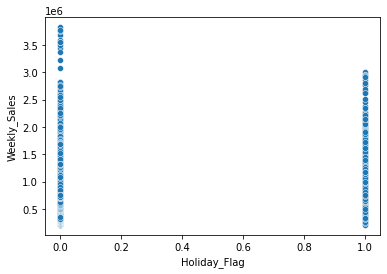

<Figure size 720x1440 with 0 Axes>

In [ ]:
sns.scatterplot(y= df['Weekly_Sales'], x = df['Holiday_Flag'])
plt.figure(figsize=(10,20))


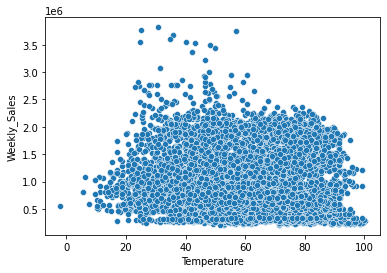

In [ ]:
sns.scatterplot(y = df['Weekly_Sales'], x = df['Temperature'])

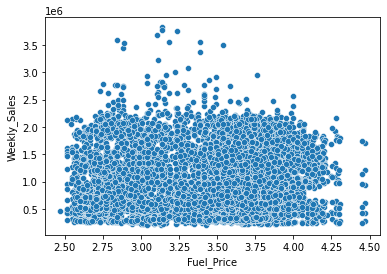

In [ ]:
sns.scatterplot(y = df['Weekly_Sales'], x = df['Fuel_Price'])

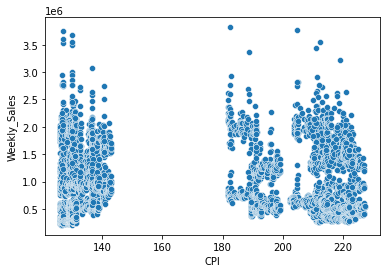

In [ ]:
sns.scatterplot(y = df['Weekly_Sales'], x = df['CPI'])

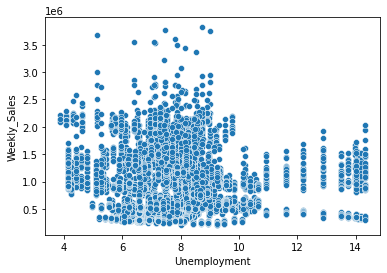

In [ ]:
sns.scatterplot(y = df['Weekly_Sales'], x = df['Unemployment'])

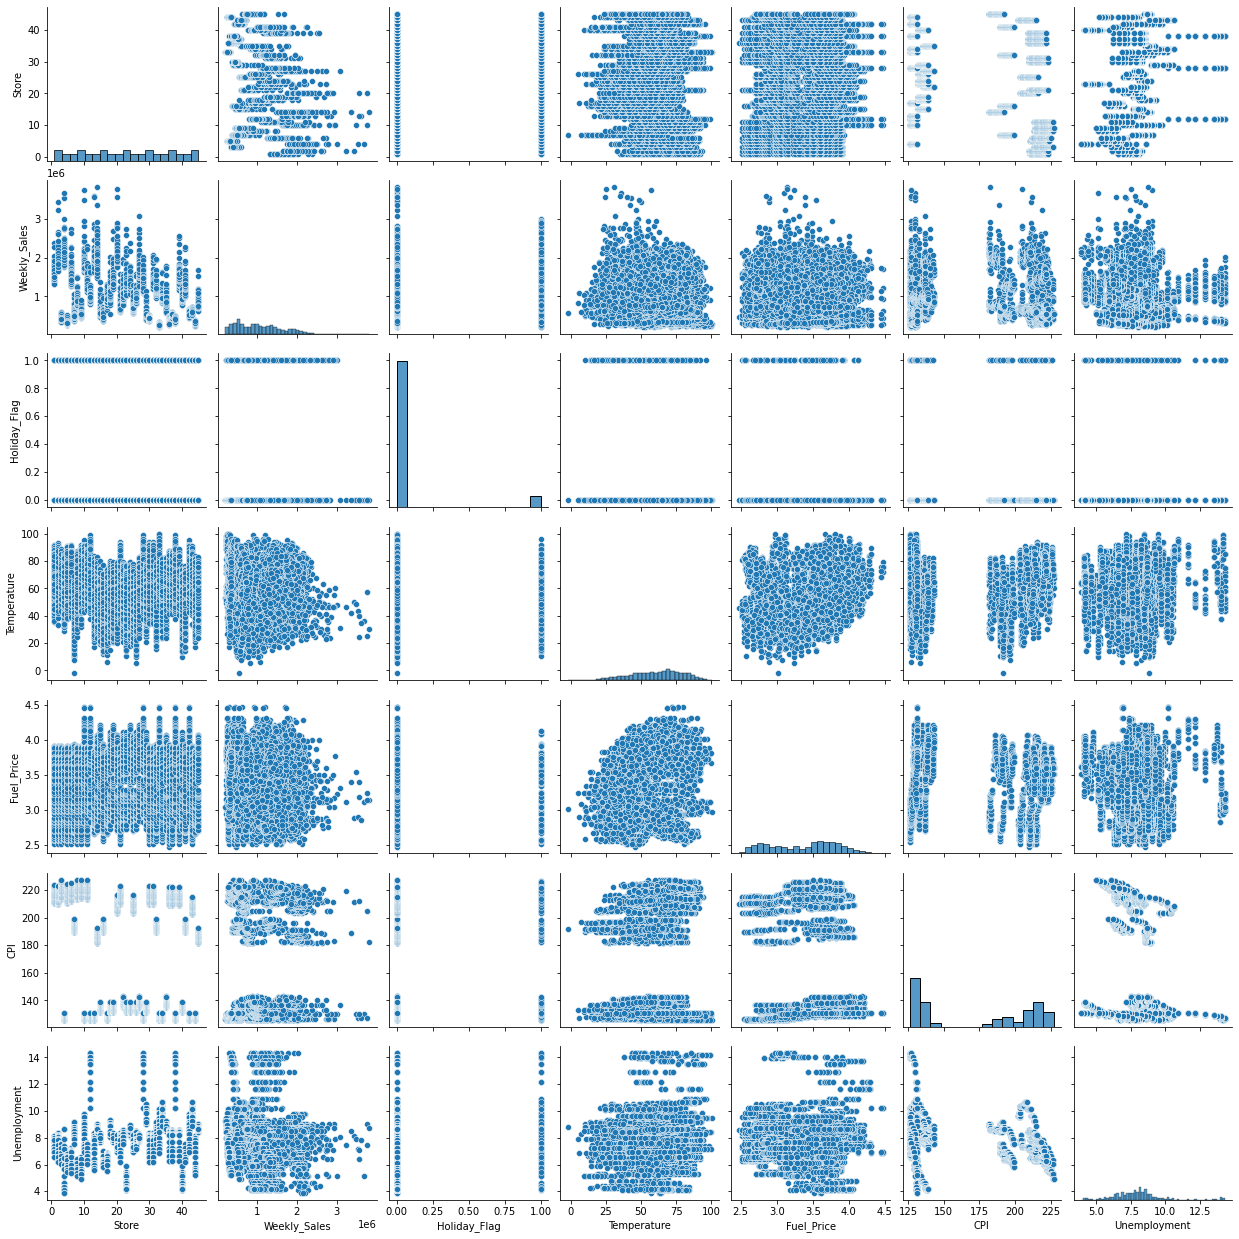

In [ ]:
sns.pairplot(df)

In [ ]:
# Reformatting the datatype to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

In [ ]:
df['ds'] = pd.DatetimeIndex((df['Year'].apply(str) + '-' + df['Month'].apply(str) + '-' + df['Day'].apply(str))) #Concatenating the dates


In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,ds
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,2010-05-02
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,2010-12-02
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,2010-02-19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,2010-02-26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,2010-05-03


In [ ]:
sm_df = df.groupby('Month')['Weekly_Sales'].sum() #visualize the sales performance of each store per month

In [ ]:
sm_df.tail()

Month
8     5.642317e+08
9     5.905323e+08
10    6.029189e+08
11    4.591693e+08
12    5.990761e+08
Name: Weekly_Sales, dtype: float64

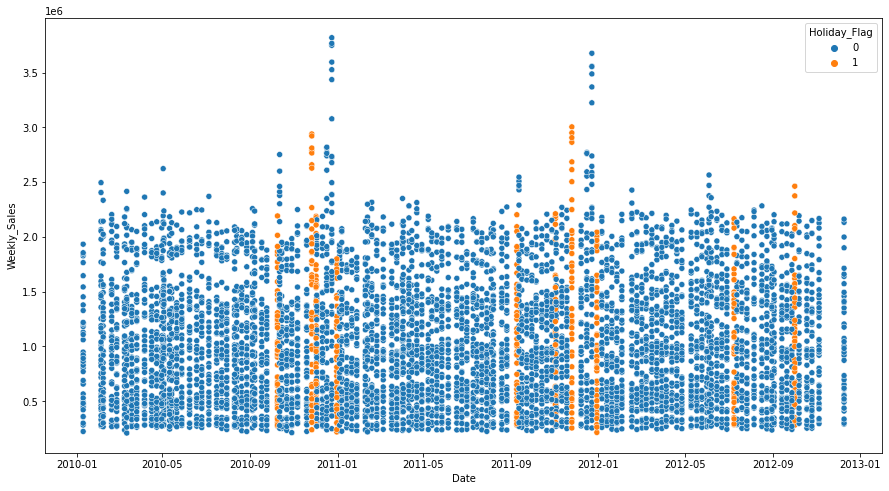

In [ ]:
plt.figure(figsize = (15,8))
sns.scatterplot(y=df['Weekly_Sales'], x=df['Date'], hue = df['Holiday_Flag'])

In [ ]:
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,ds
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,2010-05-02
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,2010-12-02
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,2010-02-19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,2010-02-26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,2010-05-03


Text(0.5, 0, 'Store ID')

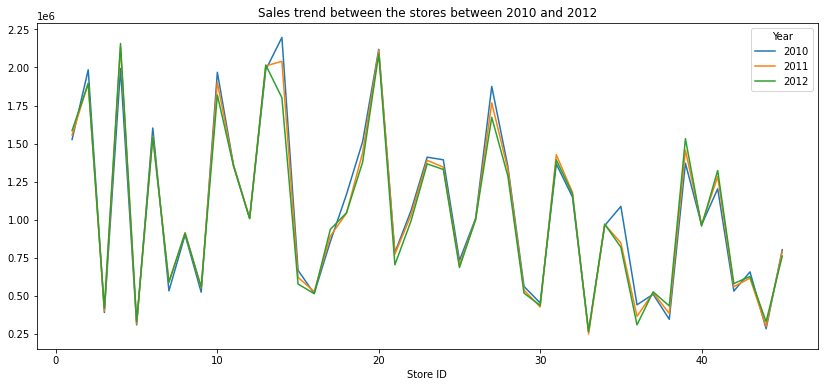

In [ ]:
df.pivot_table("Weekly_Sales", index="Store", columns="Year").plot(figsize=(14,6)) 
plt.title("Sales trend between the stores between 2010 and 2012")
#plt.ylabel("Sales")
plt.xlabel("Store ID")

In [ ]:

df_PR.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [ ]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Month                    int64
Year                     int64
Day                      int64
ds              datetime64[ns]
dtype: object

### **Sales predictive model**

In [ ]:
df.drop(columns = ['Fuel_Price', 'CPI', 'Month', 'Day', 'Year','Date'])

,Store,Weekly_Sales,Holiday_Flag,Temperature,Unemployment,ds
0,1,1643690.90,0,42.31,8.106,2010-05-02
1,1,1641957.44,1,38.51,8.106,2010-12-02
2,1,1611968.17,0,39.93,8.106,2010-02-19
3,1,1409727.59,0,46.63,8.106,2010-02-26
4,1,1554806.68,0,46.50,8.106,2010-05-03
...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,8.684,2012-09-28
6431,45,733455.07,0,64.89,8.667,2012-05-10
6432,45,734464.36,0,54.47,8.667,2012-12-10
6433,45,718125.53,0,56.47,8.667,2012-10-19


In [ ]:
df = df.loc[df.Store == 1, :]

In [ ]:
  df2 = df.reset_index()[['ds','Weekly_Sales', 'Holiday_Flag','Temperature','Unemployment']].rename({'ds':'ds', 'Weekly_Sales':'y'}, axis= 'columns')


In [ ]:
m = Prophet(interval_width = 0.95) #Fitting our model

m.add_country_holidays(country_name='US')


model = m.fit(df2)

future = m.make_future_dataframe(periods=50)

future.tail()


future


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2010-01-10
1,2010-02-04
2,2010-02-07
3,2010-02-19
4,2010-02-26
...,...
188,2013-01-25
189,2013-01-26
190,2013-01-27
191,2013-01-28


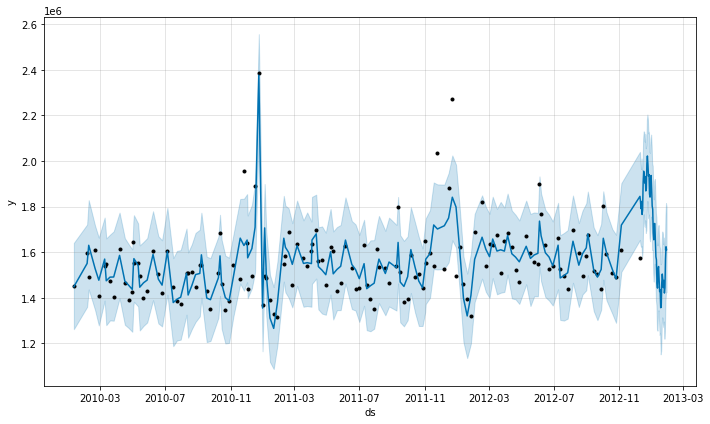

In [ ]:
forecast = model.predict(future)

fig1 = m.plot(forecast)


In [ ]:
from fbprophet.plot import plot_plotly 
import plotly.offline as py

fig = plot_plotly(m, forecast)

py.iplot(fig)


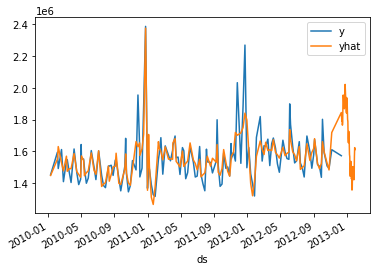

In [ ]:
pd.concat([df2.set_index('ds')['y'], forecast.set_index('ds')['yhat']], axis=1).plot()

In [ ]:
#Cross validate
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='50 days', horizon = '30 days')


# Validating the result of the test
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()
#df_p.mean()


INFO:fbprophet:Making 66 forecasts with cutoffs between 2010-03-11 00:00:00 and 2012-11-10 00:00:00


  0%|          | 0/66 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,6.122043e+12,2.474276e+06,8.716633e+05,0.562501,0.062253,0.592593
1,4 days,2.296824e+12,1.515528e+06,5.771383e+05,0.377325,0.037087,0.651852
2,5 days,2.943910e+12,1.715783e+06,8.704567e+05,0.563947,0.062253,0.562963
3,6 days,2.857606e+12,1.690446e+06,8.728722e+05,0.576036,0.076787,0.609053
4,7 days,8.961240e+12,2.993533e+06,1.267878e+06,0.845275,0.099489,0.530864


Finetune parameters iteratively

In [ ]:
import itertools #Fine tuning

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],   
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
maes = []  # Store the MAE for each params here
mapes = [] # Store the MAPE for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df2)  # Fit model with given params
    df_cv = cross_validation(m, horizon='90 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    maes.append(df_p['mae'].values[0])
    mapes.append(df_p['mape'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = maes
tuning_results['mape'] = mapes

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 14 forecasts with cutoffs between 2011-02-04 00:00:00 and 2012-09-11 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f7beb397ed0>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 14 forecasts with cutoffs between 2011-02-04 00:00:00 and 2012-09-11 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f7beb392550>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 14 forecasts with cutoffs between 2011-02-04 00:00:00 and 2012-09-11 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f7beb35dd10>
INFO:fbprophet:Disabling daily seasonality. Run p

In [ ]:
best_params = all_params[np.argmin(mapes)]
print(best_params)

{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01}


In [ ]:
#Fine-tuing parameter

m = Prophet(interval_width=0.95, weekly_seasonality=True, changepoint_prior_scale=0.01,
            changepoint_range=0.8,
            seasonality_prior_scale=0.5,
            holidays_prior_scale=1.0,
            yearly_seasonality=20,
            seasonality_mode='additive')

#seasonality_prior_scale= best_params['seasonality prior scale'])
m.add_country_holidays(country_name='US')
model = m.fit(df2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe (periods=30)

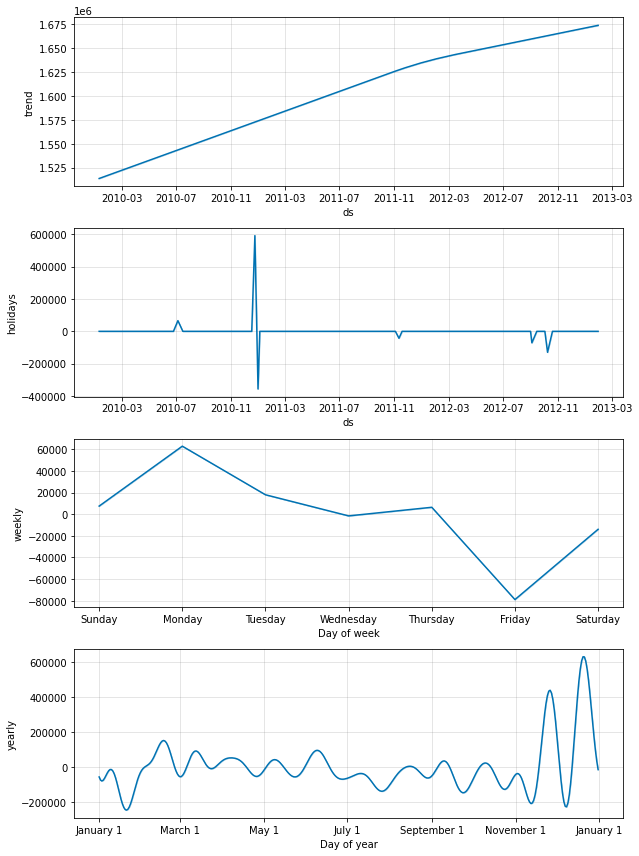

In [ ]:
fig = m.plot_components(forecast)

In [ ]:
fig = plot_plotly(m, forecast)

py.iplot(fig)

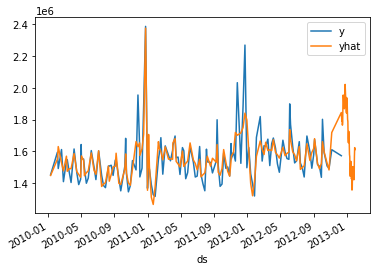

In [ ]:
pd.concat([df2.set_index('ds')['y'], forecast.set_index('ds')['yhat']], axis=1).plot()

In [ ]:

df_cv = cross_validation(m, initial='28 days', horizon = '20 days')


# Validating the result of the test

df_p = performance_metrics(df_cv)
df_p.head()
#df_p.mean()

INFO:fbprophet:Making 100 forecasts with cutoffs between 2010-02-09 00:00:00 and 2012-11-20 00:00:00


  0%|          | 0/100 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbp

,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,1.549757e+12,1.244892e+06,6.547900e+05,0.436789,0.072162,0.355556
1,3 days,1.532809e+12,1.238067e+06,5.818591e+05,0.391650,0.072162,0.387654
2,4 days,1.458406e+12,1.207645e+06,4.984872e+05,0.341112,0.037926,0.483951
3,5 days,6.406845e+12,2.531175e+06,1.056573e+06,0.746531,0.046799,0.410774
4,6 days,7.720278e+12,2.778539e+06,1.312588e+06,0.886908,0.085974,0.347578


In [ ]:
df_p.mean()

horizon       11 days 00:00:00
mse         4852317378030.3125
rmse            2117456.519837
mae             1014378.852258
mape                  0.669247
mdape                   0.0656
coverage              0.384245
dtype: object

In [ ]:
copy_df.query('unemp != unemp')

,ds,y,Hol,tem,unemp


***Break point for this function***

Linear regression Model 

In [ ]:
x = df_LR.drop(columns = ['Weekly_Sales', 'Fuel_Price', 'CPI', 'Date'], axis = 1).values
y = df_LR['Weekly_Sales'].values

In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x,y)



LinearRegression()

In [ ]:
y_prediction =  LR.predict(x_test)
y_prediction

array([1141320.06656108, 1010507.51334466, 1338876.81975514, ...,
        784386.88112071, 1338076.15385565, 1209812.32401959])

In [ ]:
#Evaluate

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r square socre is',score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))
print('mean_absolute_percentage_square_error is==', mean_absolute_percentage_error(y_test,y_prediction))

r square socre is 0.12376575366991927
mean_sqrd_error is== 282282862143.6345
root_mean_squared error of is== 531302.9852575972
mean_absolute_percentage_square_error is== 0.631893111971527


Blank---

Support Vector Regression Model

In [ ]:
df_SVR

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
x = df_SVR.drop(columns = ['Weekly_Sales', 'Fuel_Price', 'CPI', 'Date'], axis = 1).values
y = df_SVR['Weekly_Sales'].values

In [ ]:
from sklearn.svm import SVR
svr = SVR().fit(x, y)
yfit = svr.predict(x)
regressor = SVR(kernel='rbf')
regressor.fit(x,y)


SVR()

In [ ]:

print("MSE:", mean_squared_error(y, yfit))
print("MAPE:", mean_absolute_percentage_error (y, yfit))
print("MAE:", mean_absolute_error (y, yfit))


MSE: 325849586124.2824
MAPE: 0.6078436380832996
MAE: 463702.1268936859
